#### BostonHousing.csv 파일을 이용하여 w,b값을 구하고 
#### 0.00632	18.0	2.31	0	0.538	6.575	65.2	4.0900	1	296	15.3	396.90	4.98	24.0 가 주어졌을때 
#### 데이터로 주택가격을 예측하시오 
##### 정규화이용

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [26]:
data = pd.read_csv('BostonHousing.csv')
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [27]:
data = np.float32(data)

In [28]:
xdata = data[:,:-1]
ydata = data[:,[-1]]

#### 정규화

In [29]:
scale = preprocessing.MinMaxScaler()
dataN = scale.fit_transform(data)

In [30]:
dataN

array([[0.0000000e+00, 1.7999999e-01, 6.7815244e-02, ..., 1.0000000e+00,
        8.9679912e-02, 4.2222226e-01],
       [2.3592253e-04, 0.0000000e+00, 2.4230205e-01, ..., 1.0000000e+00,
        2.0447019e-01, 3.6888891e-01],
       [2.3569773e-04, 0.0000000e+00, 2.4230205e-01, ..., 9.8973721e-01,
        6.3465789e-02, 6.6000003e-01],
       ...,
       [6.1189244e-04, 0.0000000e+00, 4.2045456e-01, ..., 1.0000000e+00,
        1.0789183e-01, 4.2000002e-01],
       [1.1607299e-03, 0.0000000e+00, 4.2045456e-01, ..., 9.9130064e-01,
        1.3107064e-01, 3.7777779e-01],
       [4.6184164e-04, 0.0000000e+00, 4.2045456e-01, ..., 1.0000000e+00,
        1.6970198e-01, 1.5333334e-01]], dtype=float32)

In [31]:
xdata = dataN[:,:-1]
ydata = dataN[:,[-1]]

In [23]:
x = tf.placeholder(tf.float32, shape=[None,13])
y = tf.constant(ydata, tf.float32)

w = tf.Variable(tf.random_uniform([13,1]))
b = tf.Variable(tf.random_uniform([1]))

hx = tf.matmul(x,w) +b
cost = tf.reduce_mean( tf.square(hx-y) )

optimizer = tf.train.GradientDescentOptimizer( 0.01 )
train = optimizer.minimize( cost )
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
for i in range(10000):
    sess.run(train, {x:xdata})
    print(i,sess.run(cost, {x:xdata}))

0 10.654544
1 9.1567135
2 7.8757653
3 6.7802215
4 5.843175
5 5.0416265
6 4.3559127
7 3.7692263
8 3.2671986
9 2.8375463
10 2.4697714
11 2.1548975
12 1.8852513
13 1.6542745
14 1.45636
15 1.2867148
16 1.1412412
17 1.0164362
18 0.9093063
19 0.8172912
20 0.7382029
21 0.6701705
22 0.6115949
23 0.5611092
24 0.5175442
25 0.47990113
26 0.4473257
27 0.4190875
28 0.39456224
29 0.37321618
30 0.35459292
31 0.33830237
32 0.32401085
33 0.31143302
34 0.3003251
35 0.29047847
36 0.2817147
37 0.27388135
38 0.2668479
39 0.26050273
40 0.25475046
41 0.24950938
42 0.24470961
43 0.24029149
44 0.23620372
45 0.23240258
46 0.2288506
47 0.2255156
48 0.22237007
49 0.21939051
50 0.21655668
51 0.2138513
52 0.2112594
53 0.20876832
54 0.20636714
55 0.20404635
56 0.20179787
57 0.19961475
58 0.19749098
59 0.19542143
60 0.19340147
61 0.19142736
62 0.18949565
63 0.18760352
64 0.18574834
65 0.18392794
66 0.18214038
67 0.18038395
68 0.17865717
69 0.17695871
70 0.17528743
71 0.1736422
72 0.17202218
73 0.17042653
74 0.1688544

In [32]:
sess.run(w)

array([[-0.00488485],
       [ 0.11407509],
       [ 0.06886182],
       [ 0.05602632],
       [-0.0871711 ],
       [ 0.49078894],
       [ 0.01681704],
       [-0.23126885],
       [ 0.17408389],
       [-0.23818775],
       [-0.15659848],
       [ 0.11338565],
       [-0.4546111 ]], dtype=float32)

In [33]:
sess.run(b)

array([0.3329056], dtype=float32)

In [49]:
# 0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
arr = scale.transform([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0]])
arr[:,:13]

array([[-1.11293048e-12,  1.79999996e-01,  6.78152471e-02,
         0.00000000e+00,  3.14814851e-01,  5.77505240e-01,
         6.41606576e-01,  2.69203131e-01,  0.00000000e+00,
         2.08015264e-01,  2.87233998e-01,  1.00000001e+00,
         8.96799073e-02]])

In [67]:
data[:,[-1]]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [68]:
labelScale = preprocessing.MinMaxScaler()
y1 = labelScale.fit_transform(data[:,[-1]])

In [70]:
y1

array([[0.42222226],
       [0.3688889 ],
       [0.66      ],
       [0.63111115],
       [0.6933334 ],
       [0.5266667 ],
       [0.3977778 ],
       [0.49111116],
       [0.25555557],
       [0.30888888],
       [0.22222224],
       [0.30888888],
       [0.37111115],
       [0.34222224],
       [0.29333338],
       [0.33111113],
       [0.40222228],
       [0.2777778 ],
       [0.33777782],
       [0.29333338],
       [0.19111115],
       [0.32444447],
       [0.22666669],
       [0.21111113],
       [0.23555559],
       [0.19777778],
       [0.2577778 ],
       [0.21777779],
       [0.29777777],
       [0.35555556],
       [0.1711111 ],
       [0.21111113],
       [0.18222222],
       [0.18000004],
       [0.1888889 ],
       [0.30888888],
       [0.33333334],
       [0.35555556],
       [0.43777782],
       [0.5733333 ],
       [0.6644445 ],
       [0.48000002],
       [0.45111114],
       [0.43777782],
       [0.36000004],
       [0.31777778],
       [0.33333334],
       [0.257

In [71]:
b1 = sess.run(hx, {x:arr[:,:13]})

In [72]:
b1

array([[0.5407201]], dtype=float32)

In [73]:
labelScale.inverse_transform(b1)

array([[29.332403]], dtype=float32)

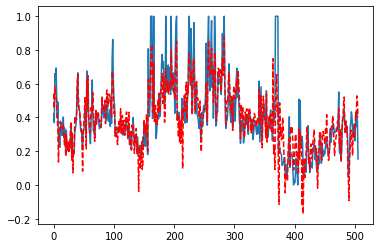

In [74]:
plt.plot(ydata)
plt.plot(sess.run(hx, {x:xdata}), 'r--')